### Monte Carlo Simulation with Python

Monte Carlo simulation is a computational technique that uses random sampling to obtain numerical results. It's particularly useful for solving problems that may be deterministic in principle but are difficult to solve directly due to the complexity of the system or the large number of variables involved.

### Example 1

Let’s use the Monte Carlo simulation to calculate π. We will follow the processes introduced above.

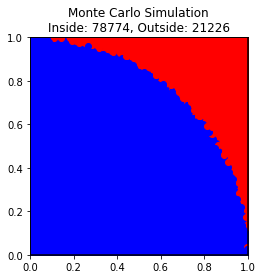

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circles_and_square(num_samples, ax):
    inside_circle = 0
    outside_circle = 0

    # Generate random points and check if they are inside the circle
    for _ in range(num_samples):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)

        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1
            ax.plot(x, y, 'bo')  # Points inside the circle in blue
        else:
            outside_circle += 1
            ax.plot(x, y, 'ro')  # Points outside the circle in red

    # Plot the unit square
    ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k-')  # Square in black

    # Plot the inscribed circle
    circle_inscribed = plt.Circle((0.5, 0.5), 0.5, color='g', fill=False, linestyle='dashed')
    ax.add_patch(circle_inscribed)

    # Plot the smaller circumscribed circle
    circle_circumscribed = plt.Circle((0.5, 0.5), np.sqrt(2)/4, color='m', fill=False, linestyle='dashed')
    ax.add_patch(circle_circumscribed)

    # Set axis limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Monte Carlo Simulation\nInside: {inside_circle}, Outside: {outside_circle}')

# Number of random samples
num_samples = 100000

# Create a plot
fig, ax = plt.subplots()
plot_circles_and_square(num_samples, ax)

# Show the plot
plt.show()


In [1]:
import random

def estimate_pi(num_samples):
    inside_circle = 0

    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate

# Number of random samples
num_samples = 100000

# Estimate pi using Monte Carlo simulation
pi_estimate = estimate_pi(num_samples)

print(f"Estimated value of pi using {num_samples} samples: {pi_estimate}")

Estimated value of pi using 100000 samples: 3.14112


In this example, the function estimate_pi generates random points in a unit square (from (0,0) to (1,1)). It then checks whether each point falls within the unit circle (distance from the origin is less than or equal to 1). The ratio of points inside the circle to the total number of points is used to estimate the value of π.

The more random samples you use (num_samples), the more accurate your estimation will be. The result should get closer to the actual value of π as the number of samples increases.

Keep in mind that Monte Carlo simulations are statistical methods, and the accuracy of the estimation depends on the number of samples generated. More samples generally lead to more accurate results, but it also means higher computational cost.

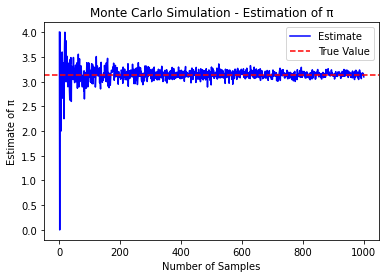

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def estimate_pi(num_samples):
    inside_circle = 0

    for _ in range(num_samples):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)

        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate

def plot_pi_estimation(num_samples):
    pi_estimates = []

    for i in range(1, num_samples + 1):
        pi_estimate = estimate_pi(i)
        pi_estimates.append(pi_estimate)

    # Plot the convergence of pi estimate
    plt.plot(range(1, num_samples + 1), pi_estimates, 'b-', label='Estimate')
    plt.axhline(y=np.pi, color='r', linestyle='--', label='True Value')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimate of π')
    plt.legend()
    plt.title(f'Monte Carlo Simulation - Estimation of π')

# Number of random samples
num_samples = 1000

# Create a single plot
plot_pi_estimation(num_samples)

# Show the plot
plt.show()

or

The idea is to randomly throw darts at the square, and by counting the number of darts that fall inside the inscribed circle, we can estimate the ratio of the areas of the circle to the square. This ratio is related to π.

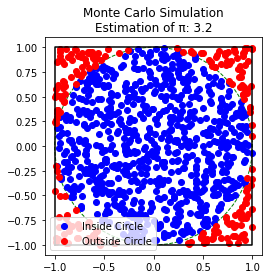

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def estimate_pi(num_darts):
    inside_circle = 0

    for _ in range(num_darts):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)

        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / num_darts) * 4
    return pi_estimate

def plot_darts_and_circle(num_darts):
    darts_x = np.random.uniform(-1, 1, num_darts)
    darts_y = np.random.uniform(-1, 1, num_darts)

    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for i in range(num_darts):
        distance = darts_x[i]**2 + darts_y[i]**2

        if distance <= 1:
            inside_x.append(darts_x[i])
            inside_y.append(darts_y[i])
        else:
            outside_x.append(darts_x[i])
            outside_y.append(darts_y[i])

    # Plot the square
    plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-')

    # Plot the inscribed circle
    circle = plt.Circle((0, 0), 1, color='g', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)

    # Plot darts inside and outside the circle
    plt.scatter(inside_x, inside_y, color='b', label='Inside Circle')
    plt.scatter(outside_x, outside_y, color='r', label='Outside Circle')

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(f'Monte Carlo Simulation\nEstimation of π: {estimate_pi(num_darts)}')

# Number of darts
num_darts = 1000

# Create a plot with darts and circles
plot_darts_and_circle(num_darts)

# Show the plot
plt.show()

or

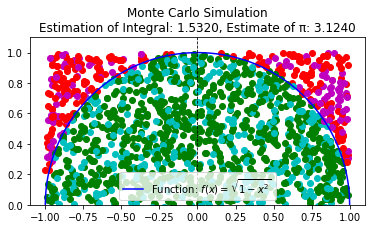

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def function_to_integrate(x):
    return np.sqrt(1 - x**2)

def estimate_integral_and_pi(num_samples):
    total_points = 0
    points_inside_integral = 0
    points_inside_circle = 0

    for _ in range(num_samples):
        x = np.random.uniform(-1, 1)
        y_integral = np.random.uniform(0, 1)
        y_circle = np.random.uniform(-1, 1)

        # Check if the point is below the curve of the function for integral estimation
        if y_integral <= function_to_integrate(x):
            points_inside_integral += 1

        # Check if the point is inside the unit circle for π estimation
        distance_circle = x**2 + y_circle**2
        if distance_circle <= 1:
            points_inside_circle += 1

        total_points += 1

    # Estimates
    integral_estimate = (points_inside_integral / total_points) * 2
    pi_estimate = (points_inside_circle / total_points) * 4

    return integral_estimate, pi_estimate

def plot_function_and_samples(num_samples):
    x_values = np.linspace(-1, 1, 1000)
    y_values = function_to_integrate(x_values)

    plt.plot(x_values, y_values, 'b-', label='Function: $f(x) = \sqrt{1 - x^2}$')

    # Randomly sample points for integral estimation and color them differently based on whether they are below or above the curve
    for _ in range(num_samples):
        x = np.random.uniform(-1, 1)
        y_integral = np.random.uniform(0, 1)
        y_circle = np.random.uniform(-1, 1)

        if y_integral <= function_to_integrate(x):
            plt.scatter(x, y_integral, color='g')  # Points below the curve (inside) for integral
        else:
            plt.scatter(x, y_integral, color='r')  # Points above the curve (outside) for integral

        # Color points differently based on whether they are inside or outside the unit circle for π estimation
        distance_circle = x**2 + y_circle**2
        if distance_circle <= 1:
            plt.scatter(x, y_circle, color='c')  # Points inside the unit circle
        else:
            plt.scatter(x, y_circle, color='m')  # Points outside the unit circle

    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)  # x-axis
    plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # y-axis
    plt.xlim(-1.1, 1.1)
    plt.ylim(0, 1.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(f'Monte Carlo Simulation\nEstimation of Integral: {estimate_integral_and_pi(num_samples)[0]:.4f}, Estimate of π: {estimate_integral_and_pi(num_samples)[1]:.4f}')

# Number of samples
num_samples = 1000

# Create a plot with the function and sampled points for integral and π estimation
plot_function_and_samples(num_samples)

# Show the plot
plt.show()


### Example 2

#### Problem Statement
We are tasked with calculating the expected number of rounds before losing two times in a row in a game where each round has a probability $p$ of winning.

* Expected Number of Rounds in a Game


#### Approach

We approach this problem by defining three states based on the outcome of the most recent rounds:

1. **State 0**: No loss has occurred yet or the previous round was a win. This is the initial state.
2. **State 1**: Exactly one loss has occurred in the previous round.
3. **State 2**: The game ends with two consecutive losses. This is the terminal state.

We are interested in finding the expected number of rounds played, $E[0]$, starting from State 0.

The transitions between these states are governed by the following equations:

- $E[0] = 1 + pE[0] + (1-p)E[1]$
- $E[1] = 1 + pE[0]$
- $E[2] = 0$

#### Solution

To find the expected number of rounds $E[0]$, we solve the system of equations given above, yielding:

$$E[0] = \frac{2 - p}{p^2 - 2p + 1}$$

This formula gives us the expected number of rounds based on the probability $p$ of winning each round.

#### Conclusion

The expected number of rounds before losing two times in a row, given a probability $p$ of winning, is calculated using the formula above. This provides a quantitative measure of how the probability of winning each round affects the game's duration.

In [21]:
import random

# Define the Monte Carlo simulation function
def monte_carlo_simulation(p, num_simulations=10000):
    total_rounds = 0

    for _ in range(num_simulations):
        consecutive_losses = 0
        rounds = 0
        while consecutive_losses < 2:
            win = random.random() < p # random value between 0 and 1
            if win:
                consecutive_losses = 0
            else:
                consecutive_losses += 1
            rounds += 1
        total_rounds += rounds

    # Calculate the average number of rounds per simulation
    average_rounds = total_rounds / num_simulations
    return average_rounds

# Probability of winning each round
p_value = 0.5

# Perform Monte Carlo simulation
monte_carlo_result = monte_carlo_simulation(p_value)

# Analytical solution
analytical_result = expected_rounds(p_value)

monte_carlo_result, analytical_result

(6.0328, 6.0)


      
      END